In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


df = pd.read_csv('/Users/tapankhaladkar/Intellipaat/Walmart/Walmart.csv') # Assuming the uploaded file is a csv.
print(df.head()) # Display first few rows

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print(df.isnull())
df.isnull().sum()

      Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     False  False         False         False        False       False   
1     False  False         False         False        False       False   
2     False  False         False         False        False       False   
3     False  False         False         False        False       False   
4     False  False         False         False        False       False   
...     ...    ...           ...           ...          ...         ...   
6430  False  False         False         False        False       False   
6431  False  False         False         False        False       False   
6432  False  False         False         False        False       False   
6433  False  False         False         False        False       False   
6434  False  False         False         False        False       False   

        CPI  Unemployment  
0     False         False  
1     False         False  
2     False    

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## **Outlier Analysis**

In [5]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print("Weekly Sales Outliers Analysis:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

Weekly Sales Outliers Analysis:
Number of outliers: 34
Percentage of outliers: 0.53%
Lower bound: -746862.73
Upper bound: 2720371.49


Q1. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [ ]:
overall_corr = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Overall correlation between Weekly Sales and Unemployment: {overall_corr:.4f}")

store_analysis = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]

    corr, p_value = pearsonr(store_data['Weekly_Sales'], store_data['Unemployment'])

    avg_sales = store_data['Weekly_Sales'].mean()
    sales_std = store_data['Weekly_Sales'].std()
    cv = (sales_std / avg_sales) * 100

    store_analysis.append({
        'Store': store,
        'Correlation': corr,
        'P_Value': p_value,
        'Avg_Sales': avg_sales,
        'CV': cv,
        'Data_Points': len(store_data)
    })

store_stats = pd.DataFrame(store_analysis)
store_stats_sorted = store_stats.sort_values('Correlation', key=abs, ascending=False)

print("\nTop 5 stores most affected by unemployment:")
print(store_stats_sorted.head())

Overall correlation between Weekly Sales and Unemployment: -0.1062

Top 5 stores most affected by unemployment:
    Store  Correlation       P_Value     Avg_Sales         CV  Data_Points
35     36     0.833734  3.436607e-38  3.735120e+05  16.257891          143
37     38    -0.785290  3.721186e-31  3.857317e+05  11.087545          143
43     44    -0.780076  1.654147e-30  3.027489e+05   8.179331          143
34     35     0.483865  9.236523e-10  9.197250e+05  22.968111          143
38     39    -0.384681  2.099708e-06  1.450668e+06  14.990779          143


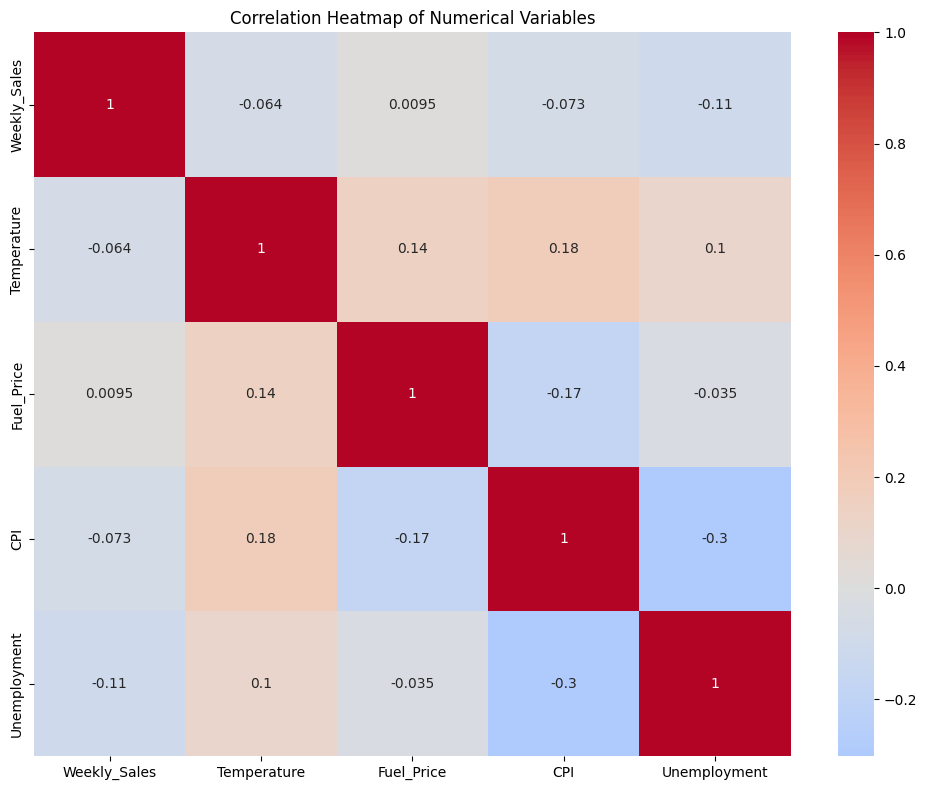

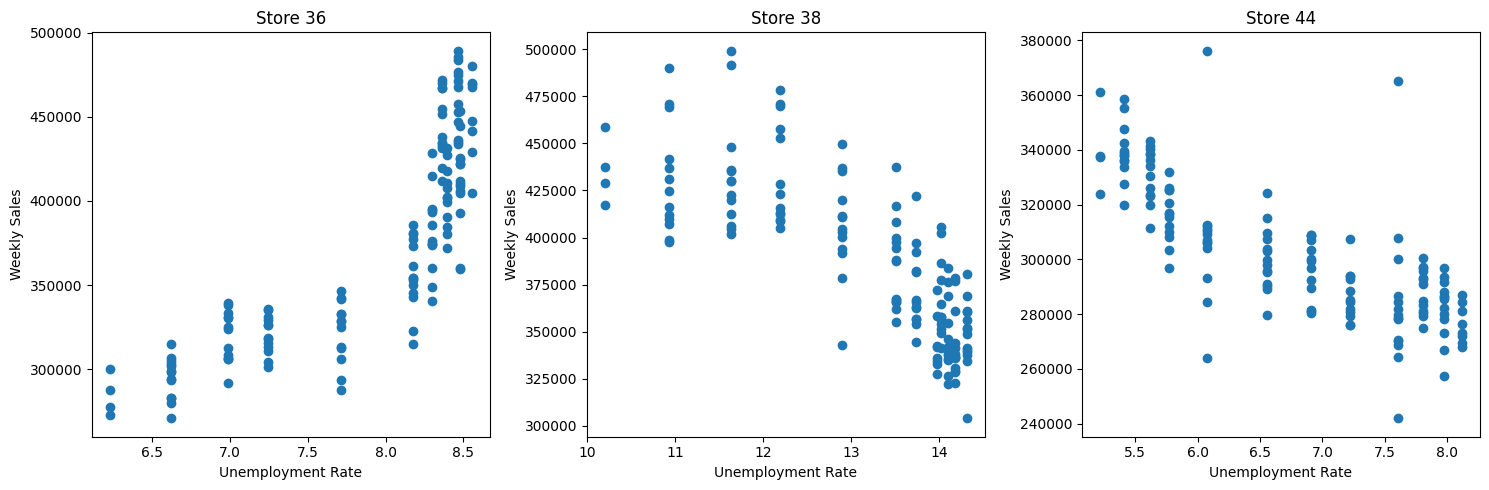

In [ ]:
# 4.1 Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# 4.2 Scatter plots for top correlated stores
top_stores = store_stats_sorted['Store'].head(3).tolist()
plt.figure(figsize=(15, 5))

for idx, store in enumerate(top_stores, 1):
    plt.subplot(1, 3, idx)
    store_data = df[df['Store'] == store]
    plt.scatter(store_data['Unemployment'], store_data['Weekly_Sales'])
    plt.title(f'Store {store}')
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()



In [ ]:
print("Summary Statistics:")
print(f"Total number of stores: {len(store_stats)}")
print(f"Stores with negative correlation: {len(store_stats[store_stats['Correlation'] < 0])}")
print(f"Stores with positive correlation: {len(store_stats[store_stats['Correlation'] > 0])}")
print(f"Average correlation: {store_stats['Correlation'].mean():.4f}")

Summary Statistics:
Total number of stores: 45
Stores with negative correlation: 29
Stores with positive correlation: 16
Average correlation: -0.0569


## **b. If the weekly sales show a seasonal trend, when and what could be the reason?**

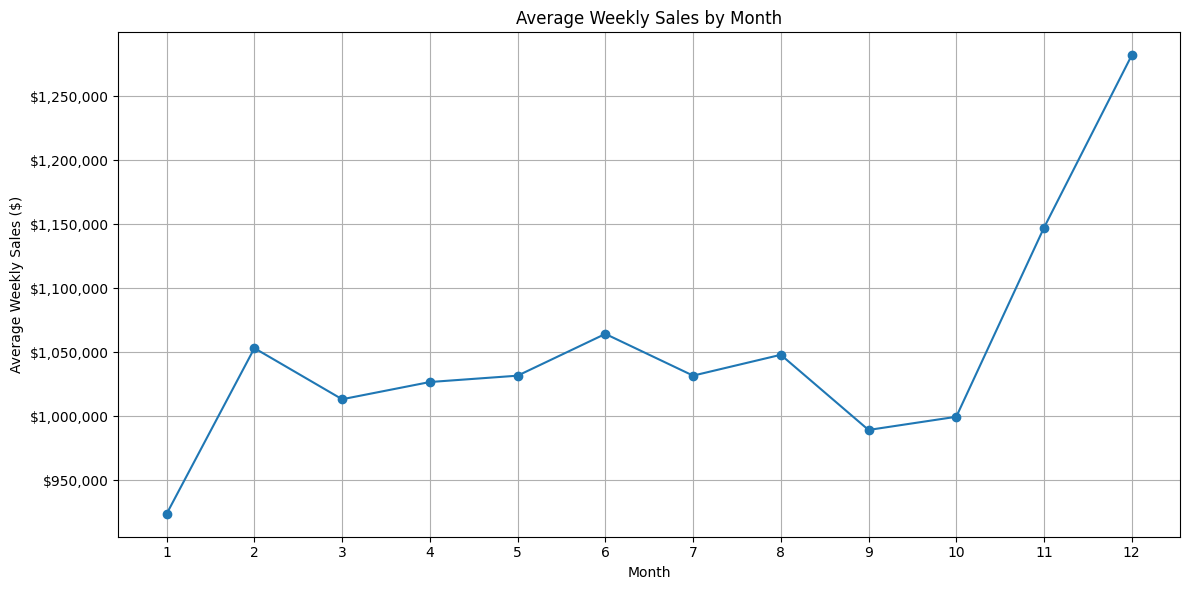


Monthly Sales Statistics:
      Weekly_Sales                  Holiday_Flag
              mean        std count          sum
Month                                           
1        923884.55  472616.46   360            0
2       1053199.80  564207.06   540          135
3       1013309.23  529805.74   585            0
4       1026761.56  543864.62   630            0
5       1031714.02  536589.41   540            0
6       1064324.59  548683.95   585            0
7       1031747.58  531141.78   630            0
8       1048017.45  542653.06   585            0
9        989335.35  510532.95   585          135
10       999632.12  517186.65   585            0
11      1147265.90  648832.35   360           90
12      1281863.63  774037.72   450           90

Holiday vs Non-Holiday Sales:
                    mean        std
Holiday_Flag                       
0             1041256.38  558957.44
1             1122887.89  627684.93


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month and year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate average sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.grid(True)

# Set x-axis ticks to show all months
plt.xticks(range(1, 13))

# Format y-axis to show dollars in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print monthly statistics
print("\nMonthly Sales Statistics:")
monthly_stats = df.groupby('Month').agg({
    'Weekly_Sales': ['mean', 'std', 'count'],
    'Holiday_Flag': 'sum'
}).round(2)
print(monthly_stats)

# Analyze holiday impact
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'std']).round(2)
print("\nHoliday vs Non-Holiday Sales:")
print(holiday_sales)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month and year from Date
df['Month'] = df['Date'].dt.month

temp_corr = df['Weekly_Sales'].corr(df['Temperature'])

print(f"Overall correlation between Temperature and Sales: {temp_corr:.4f}")

Overall correlation between Temperature and Sales: -0.0638


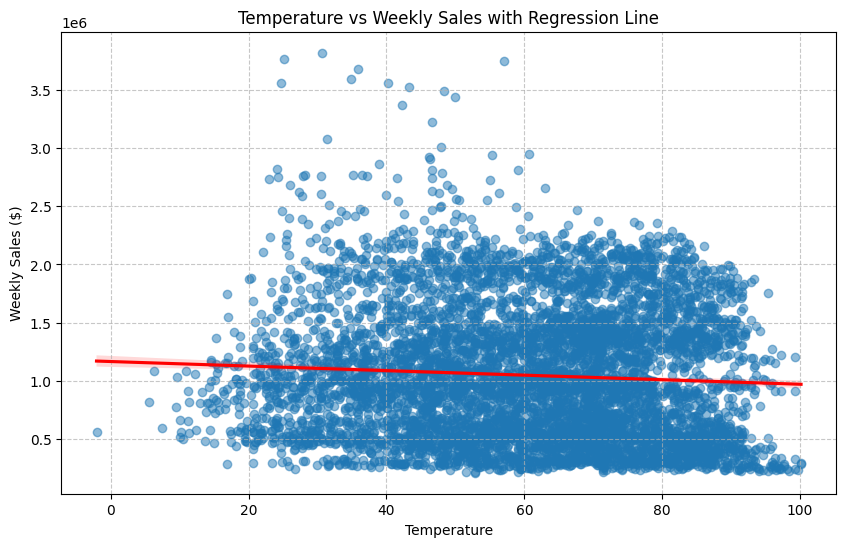

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Temperature', y='Weekly_Sales', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Temperature vs Weekly Sales with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



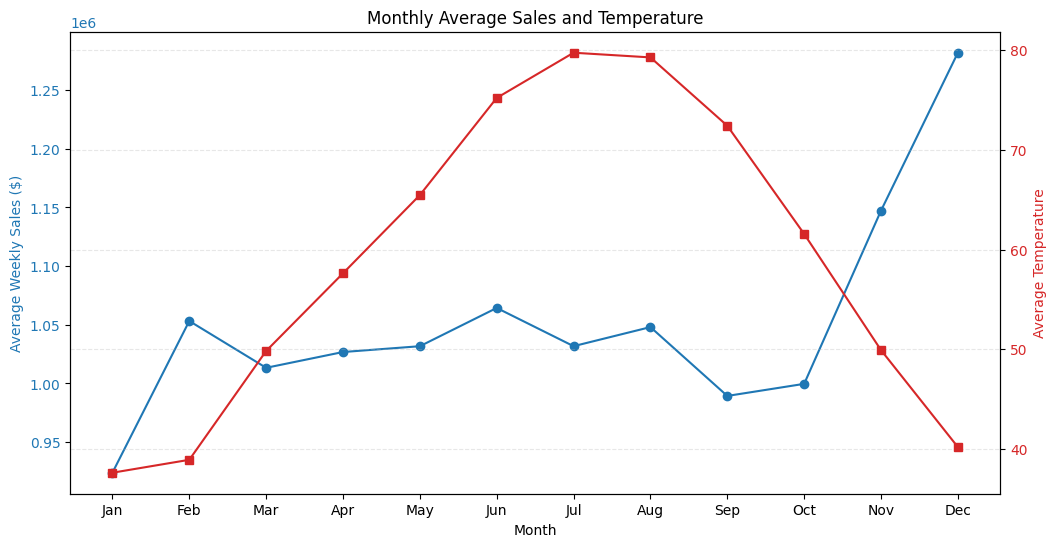


Sales by Temperature Range:
                  mean        std  count
Temp_Range                              
Cold        1092913.37  574848.64   1609
Cool        1050522.19  569645.83   1609
Warm        1054986.73  530963.93   1608
Hot          989442.20  576402.38   1609

Top 5 Stores Most Affected by Temperature:
    Store  Temperature_Correlation
43     44                 0.267822
25     26                 0.211722
15     16                 0.182948
26     27                 0.121809
23     24                 0.111833

Bottom 5 Stores Most Affected by Temperature (Negative Correlation):
    Store  Temperature_Correlation
9      10                -0.432569
11     12                -0.379416
2       3                -0.377524
27     28                -0.376506
29     30                -0.330816


<ipython-input-16-f8b4c18fb4ff>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_range_analysis = df.groupby('Temp_Range')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)


In [ ]:
monthly_data = df.groupby('Month').agg({
    'Temperature': 'mean',
    'Weekly_Sales': 'mean',
    'Store': 'count'
}).reset_index()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sales
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Weekly Sales ($)', color=color)
ax1.plot(monthly_data['Month'], monthly_data['Weekly_Sales'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Temperature', color=color)
ax2.plot(monthly_data['Month'], monthly_data['Temperature'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Average Sales and Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 4. Temperature range analysis
df['Temp_Range'] = pd.qcut(df['Temperature'], q=4, labels=['Cold', 'Cool', 'Warm', 'Hot'])
temp_range_analysis = df.groupby('Temp_Range')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)
print("\nSales by Temperature Range:")
print(temp_range_analysis)

# 5. Store-wise temperature correlation
store_temp_corr = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    corr = store_data['Weekly_Sales'].corr(store_data['Temperature'])
    store_temp_corr.append({
        'Store': store,
        'Temperature_Correlation': corr
    })

store_corr_df = pd.DataFrame(store_temp_corr)
print("\nTop 5 Stores Most Affected by Temperature:")
print(store_corr_df.nlargest(5, 'Temperature_Correlation'))
print("\nBottom 5 Stores Most Affected by Temperature (Negative Correlation):")
print(store_corr_df.nsmallest(5, 'Temperature_Correlation'))

## **d. How is the Consumer Price index affecting the weekly sales of various stores?**

Overall correlation between CPI and Weekly Sales: -0.0726


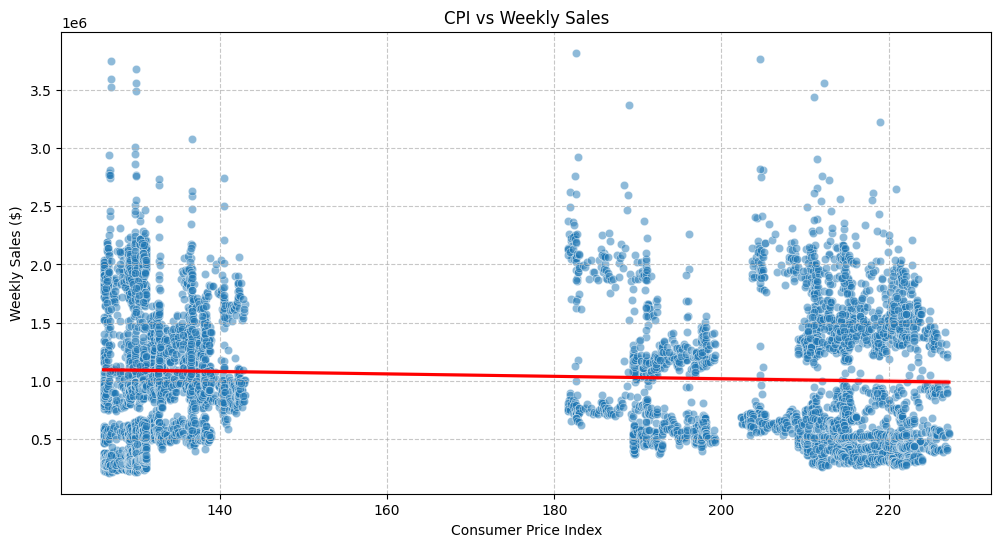


Top 5 Stores Most Positively Affected by CPI:
    Store  CPI_Correlation  Sales_Sensitivity
37     38           0.8128         18707.1752
43     44           0.7401          9862.8886
38     39           0.4280         21570.9737
40     41           0.3923         23008.5446
41     42           0.3609          9760.4405

Top 5 Stores Most Negatively Affected by CPI:
    Store  CPI_Correlation  Sales_Sensitivity
35     36          -0.9151        -12877.3068
34     35          -0.4241        -36731.5820
13     14          -0.4198        -37081.5504
29     30          -0.2982         -1566.3570
42     43          -0.2857         -2815.7381

Sales by CPI Range:
                   mean        std  count
CPI_Range                                
Low          1062885.29  668508.20   1613
Medium-Low   1122758.02  423459.67   1605
Medium-High  1028030.13  572389.82   1608
High          974323.15  555423.11   1609


<ipython-input-19-27afdc4944c7>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_range_analysis = df.groupby('CPI_Range')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)


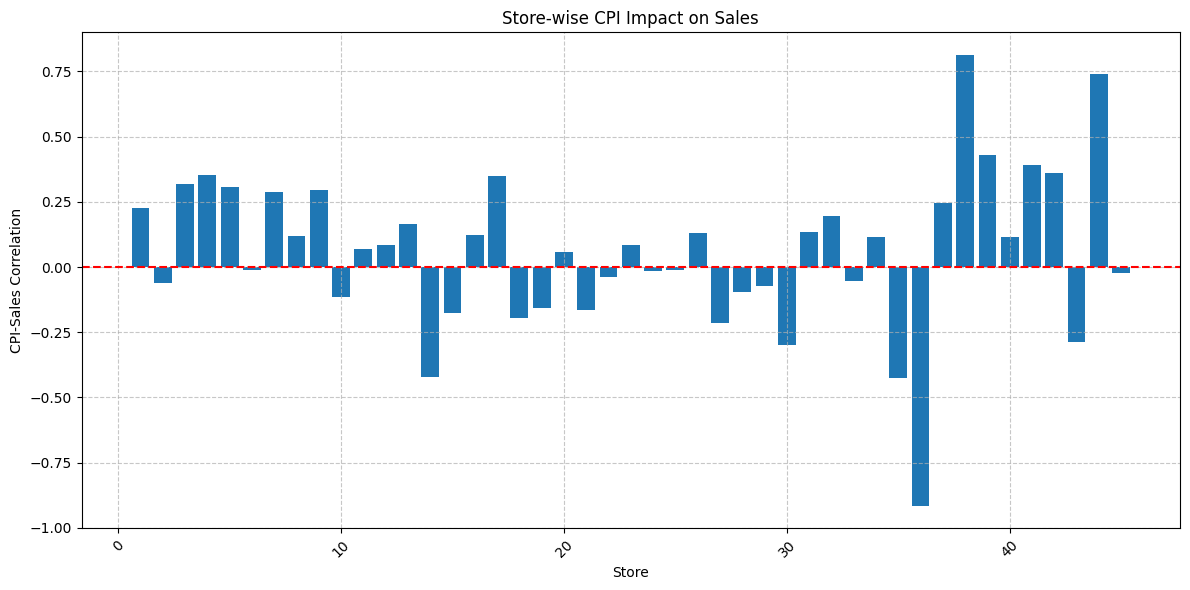

In [ ]:
overall_corr = df['Weekly_Sales'].corr(df['CPI'])
print(f"Overall correlation between CPI and Weekly Sales: {overall_corr:.4f}")

# 2. Store-wise CPI Impact Analysis
store_cpi_analysis = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['Weekly_Sales'].corr(store_data['CPI'])
    avg_sales = store_data['Weekly_Sales'].mean()

    # Linear regression to get slope (impact magnitude)
    slope, _, _, _, _ = stats.linregress(store_data['CPI'], store_data['Weekly_Sales'])

    store_cpi_analysis.append({
        'Store': store,
        'CPI_Correlation': correlation,
        'Sales_Sensitivity': slope,
        'Avg_Sales': avg_sales
    })

store_analysis_df = pd.DataFrame(store_cpi_analysis)

# Create scatter plot for CPI vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', alpha=0.5)
sns.regplot(data=df, x='CPI', y='Weekly_Sales', scatter=False, color='red')
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print stores most affected by CPI
print("\nTop 5 Stores Most Positively Affected by CPI:")
print(store_analysis_df.nlargest(5, 'CPI_Correlation')[['Store', 'CPI_Correlation', 'Sales_Sensitivity']].round(4))

print("\nTop 5 Stores Most Negatively Affected by CPI:")
print(store_analysis_df.nsmallest(5, 'CPI_Correlation')[['Store', 'CPI_Correlation', 'Sales_Sensitivity']].round(4))

# Create CPI ranges for analysis
df['CPI_Range'] = pd.qcut(df['CPI'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
cpi_range_analysis = df.groupby('CPI_Range')['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)
print("\nSales by CPI Range:")
print(cpi_range_analysis)

# Visualize store-wise CPI impact
plt.figure(figsize=(12, 6))
plt.bar(store_analysis_df['Store'], store_analysis_df['CPI_Correlation'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Store-wise CPI Impact on Sales')
plt.xlabel('Store')
plt.ylabel('CPI-Sales Correlation')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **e. Top performing stores according to the historical data.**

Top 5 Stores by Average Weekly Sales:
        Avg_Sales  Sales_Std   Min_Sales   Max_Sales  Weeks_Count  Sales_CV
Store                                                                      
20     2107676.87  275900.56  1761016.51  3766687.43          143     13.09
4      2094712.96  266201.44  1762539.30  3676388.98          143     12.71
14     2020978.40  317569.95  1479514.66  3818686.45          143     15.71
13     2003620.31  265507.00  1633663.12  3595903.20          143     13.25
2      1925751.34  237683.69  1650394.44  3436007.68          143     12.34


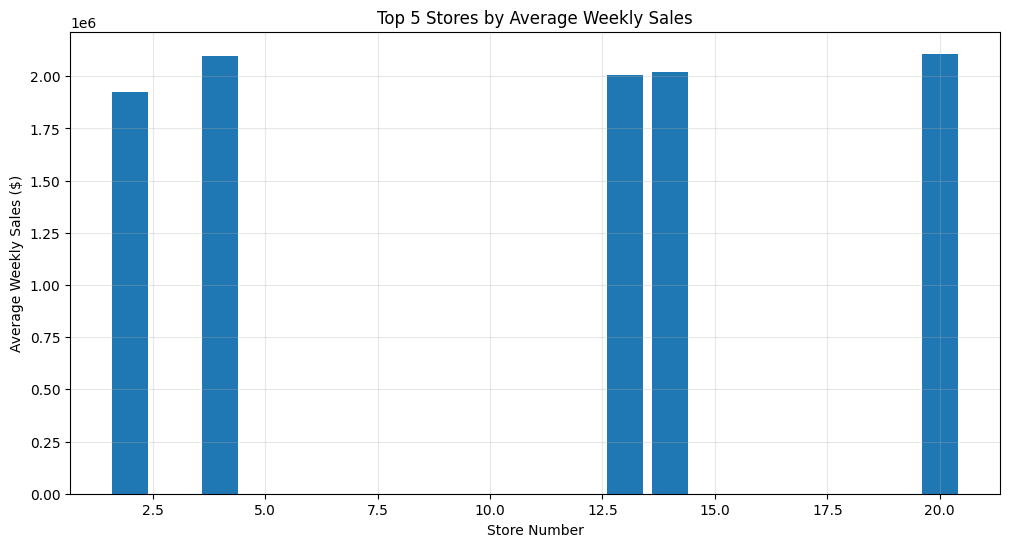


Top 5 Stores by Growth Rate:
Store
38    11.976967
44     7.917660
39     5.738774
7      5.373710
41     4.888150
dtype: float64

Top 5 Most Consistent Stores (Lowest Coefficient of Variation):
        Avg_Sales  Sales_CV
Store                      
37      518900.28      4.21
30      438579.62      5.20
43      633324.72      6.41
44      302748.87      8.18
31     1395901.44      9.02

Top 5 Stores During Holiday Periods:
Store
20    2249035.081
4     2243102.624
14    2120582.998
10    2113755.949
13    2113043.806


In [ ]:
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'min', 'max'],
    'Store': 'count'  # number of observations
}).round(2)

# Rename columns for clarity
store_performance.columns = ['Avg_Sales', 'Sales_Std', 'Min_Sales', 'Max_Sales', 'Weeks_Count']

# Calculate Coefficient of Variation (CV) for consistency
store_performance['Sales_CV'] = (store_performance['Sales_Std'] / store_performance['Avg_Sales'] * 100).round(2)

# Sort by average sales
top_stores = store_performance.sort_values('Avg_Sales', ascending=False)

print("Top 5 Stores by Average Weekly Sales:")
print(top_stores.head().to_string())

# 2. Visualization of Top Stores
plt.figure(figsize=(12, 6))
plt.bar(top_stores.head().index, top_stores.head()['Avg_Sales'])
plt.title('Top 5 Stores by Average Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales ($)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Growth Analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year

yearly_growth = df.pivot_table(
    values='Weekly_Sales',
    index='Store',
    columns='Year',
    aggfunc='mean'
).pct_change(axis=1) * 100

print("\nTop 5 Stores by Growth Rate:")
print(yearly_growth.mean(axis=1).sort_values(ascending=False).head())

# 4. Consistency Analysis (Lowest CV)
print("\nTop 5 Most Consistent Stores (Lowest Coefficient of Variation):")
print(store_performance.sort_values('Sales_CV').head()[['Avg_Sales', 'Sales_CV']].to_string())

# 5. Holiday Performance
holiday_performance = df[df['Holiday_Flag'] == 1].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

print("\nTop 5 Stores During Holiday Periods:")
print(holiday_performance.head().to_string())

## f. Worst performing states according to the historical data

Top 5 Performing Stores:
        Avg_Sales  Sales_Std
Store                       
20     2107676.87  275900.56
4      2094712.96  266201.44
14     2020978.40  317569.95
13     2003620.31  265507.00
2      1925751.34  237683.69

Bottom 5 Performing Stores:
       Avg_Sales  Sales_Std
Store                      
33     259861.69   24132.93
44     302748.87   24762.83
5      318011.81   37737.97
36     373511.99   60725.17
38     385731.65   42768.17

Performance Gap Analysis:
Absolute difference in average sales: $1,702,574.77
Performance ratio: 6.19x
Percentage difference: 519.1%


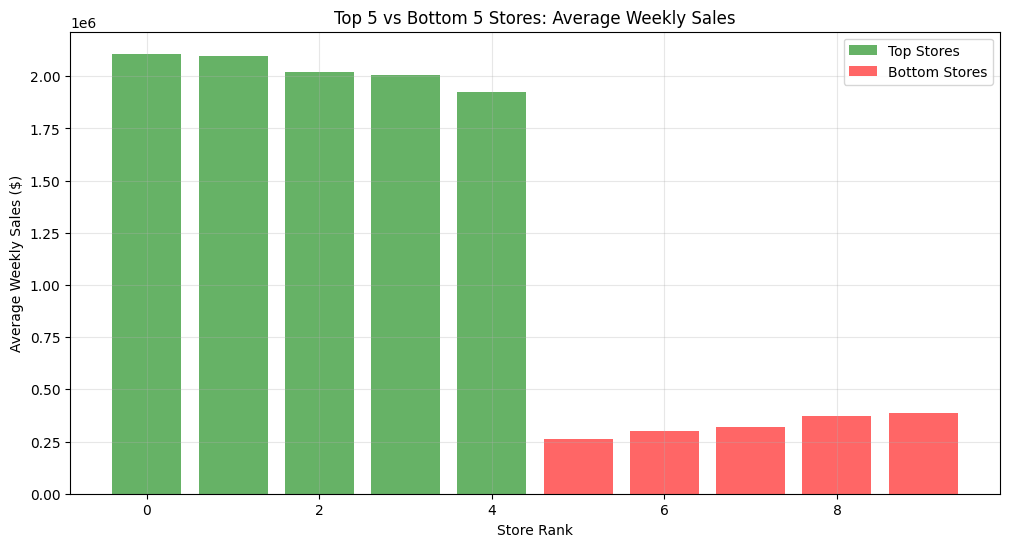


Comparative Metrics:
         Top_5_Avg  Bottom_5_Avg  Top_5_Std  Bottom_5_Std   Top_5_Min  Bottom_5_Min   Top_5_Max  Bottom_5_Max
Values  2030547.98      327973.2  272572.53      38025.41  1657425.61     257429.37  3658734.75     440789.43


In [ ]:
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

store_performance.columns = ['Avg_Sales', 'Sales_Std', 'Min_Sales', 'Max_Sales', 'Weeks_Count']

# Sort stores by average sales
best_stores = store_performance.nlargest(5, 'Avg_Sales')
worst_stores = store_performance.nsmallest(5, 'Avg_Sales')

# Calculate performance gap
performance_gap = (best_stores['Avg_Sales'].mean() - worst_stores['Avg_Sales'].mean())
performance_ratio = (best_stores['Avg_Sales'].mean() / worst_stores['Avg_Sales'].mean())

print("Top 5 Performing Stores:")
print(best_stores[['Avg_Sales', 'Sales_Std']].to_string())

print("\nBottom 5 Performing Stores:")
print(worst_stores[['Avg_Sales', 'Sales_Std']].to_string())

print("\nPerformance Gap Analysis:")
print(f"Absolute difference in average sales: ${performance_gap:,.2f}")
print(f"Performance ratio: {performance_ratio:.2f}x")
print(f"Percentage difference: {((performance_ratio - 1) * 100):.1f}%")

# Visualize the comparison
plt.figure(figsize=(12, 6))
plt.bar(range(5), best_stores['Avg_Sales'], color='green', alpha=0.6, label='Top Stores')
plt.bar(range(5, 10), worst_stores['Avg_Sales'], color='red', alpha=0.6, label='Bottom Stores')
plt.title('Top 5 vs Bottom 5 Stores: Average Weekly Sales')
plt.xlabel('Store Rank')
plt.ylabel('Average Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate additional comparative metrics
comparative_metrics = pd.DataFrame({
    'Top_5_Avg': best_stores['Avg_Sales'].mean(),
    'Bottom_5_Avg': worst_stores['Avg_Sales'].mean(),
    'Top_5_Std': best_stores['Sales_Std'].mean(),
    'Bottom_5_Std': worst_stores['Sales_Std'].mean(),
    'Top_5_Min': best_stores['Min_Sales'].mean(),
    'Bottom_5_Min': worst_stores['Min_Sales'].mean(),
    'Top_5_Max': best_stores['Max_Sales'].mean(),
    'Bottom_5_Max': worst_stores['Max_Sales'].mean(),
}, index=['Values'])

print("\nComparative Metrics:")
print(comparative_metrics.round(2).to_string())

## Q2. Use predictive modelling techniques to predict the store performance for the next 12 weeks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Display first few rows to verify
print("Dataset after feature extraction:")
print(df.head())

Dataset after feature extraction:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  Day_of_Week  
0  211.096358         8.106  2010      2     5            4  
1  211.242170         8.106  2010      2     6            4  
2  211.289143         8.106  2010      2     7            4  
3  211.319643         8.106  2010      2     8            4  
4  211.350143         8.106  2010      3     9            4  


In [ ]:
# Create lag features and rolling means
df['Sales_Lag1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Sales_Lag2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Sales_Rolling_Mean'] = df.groupby('Store')['Weekly_Sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

# Remove rows with NaN values
df = df.dropna()

print("\nFeatures created:")
print(df.columns.tolist())


Features created:
['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day_of_Week', 'Sales_Lag1', 'Sales_Lag2', 'Sales_Rolling_Mean']


In [ ]:
# Prepare features for modeling
feature_columns = ['Month', 'Week', 'Day_of_Week', 'Temperature',
                  'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag',
                  'Sales_Lag1', 'Sales_Lag2', 'Sales_Rolling_Mean']

# Initialize dictionaries to store models and predictions
store_models = {}
predictions_by_store = {}

# Train separate model for each store
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]

    X_store = store_data[feature_columns]
    y_store = store_data['Weekly_Sales']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_store, y_store, test_size=0.2, random_state=42
    )

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Store model and calculate accuracy
    store_models[store] = model
    accuracy = model.score(X_test, y_test)
    print(f"Store {store} - R² Score: {accuracy:.4f}")

Store 1 - R² Score: 0.1565
Store 2 - R² Score: -1.0310
Store 3 - R² Score: 0.3581
Store 4 - R² Score: 0.1056
Store 5 - R² Score: 0.1079
Store 6 - R² Score: 0.2286
Store 7 - R² Score: 0.1519
Store 8 - R² Score: -0.8491
Store 9 - R² Score: -0.0978
Store 10 - R² Score: -0.2741
Store 11 - R² Score: 0.1040
Store 12 - R² Score: -0.7735
Store 13 - R² Score: 0.0434
Store 14 - R² Score: -0.0948
Store 15 - R² Score: -0.4923
Store 16 - R² Score: -0.1075
Store 17 - R² Score: 0.0960
Store 18 - R² Score: -0.1364
Store 19 - R² Score: -0.9201
Store 20 - R² Score: -0.3817
Store 21 - R² Score: -0.7741
Store 22 - R² Score: 0.2295
Store 23 - R² Score: 0.1063
Store 24 - R² Score: -0.3186
Store 25 - R² Score: 0.4691
Store 26 - R² Score: 0.2741
Store 27 - R² Score: -0.2978
Store 28 - R² Score: -0.2726
Store 29 - R² Score: -1.2639
Store 30 - R² Score: 0.0936
Store 31 - R² Score: -0.7244
Store 32 - R² Score: -0.0950
Store 33 - R² Score: 0.7355
Store 34 - R² Score: -1.8424
Store 35 - R² Score: -0.7218
Store 36 

In [ ]:
# Prepare future dates for prediction
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + timedelta(days=7),
                           periods=12,
                           freq='W')

# Create future features dataframe
future_data = pd.DataFrame({
    'Date': future_dates,
    'Month': future_dates.month,
    'Week': future_dates.isocalendar().week,
    'Day_of_Week': future_dates.dayofweek,
    'Temperature': df['Temperature'].mean(),
    'Fuel_Price': df['Fuel_Price'].iloc[-1],
    'CPI': df['CPI'].iloc[-1],
    'Unemployment': df['Unemployment'].iloc[-1],
    'Holiday_Flag': 0
})

print("Future data prepared:")
print(future_data.head())

Future data prepared:
                 Date  Month  Week  Day_of_Week  Temperature  Fuel_Price  \
2012-11-04 2012-11-04     11    44            6    61.040654       3.882   
2012-11-11 2012-11-11     11    45            6    61.040654       3.882   
2012-11-18 2012-11-18     11    46            6    61.040654       3.882   
2012-11-25 2012-11-25     11    47            6    61.040654       3.882   
2012-12-02 2012-12-02     12    48            6    61.040654       3.882   

                   CPI  Unemployment  Holiday_Flag  
2012-11-04  192.308899         8.667             0  
2012-11-11  192.308899         8.667             0  
2012-11-18  192.308899         8.667             0  
2012-11-25  192.308899         8.667             0  
2012-12-02  192.308899         8.667             0  


In [ ]:
# Generate predictions for all stores
all_predictions = []

for store in store_models.keys():
    store_data = df[df['Store'] == store].iloc[-12:]
    predictions = []
    current_features = future_data.copy()

    # Generate predictions week by week
    for week in range(12):
        if week == 0:
            current_features['Sales_Lag1'] = store_data['Weekly_Sales'].iloc[-1]
            current_features['Sales_Lag2'] = store_data['Weekly_Sales'].iloc[-2]
            current_features['Sales_Rolling_Mean'] = store_data['Weekly_Sales'].mean()
        else:
            current_features['Sales_Lag1'] = predictions[-1]
            current_features['Sales_Lag2'] = predictions[-2] if week > 1 else store_data['Weekly_Sales'].iloc[-1]
            current_features['Sales_Rolling_Mean'] = np.mean(
                predictions[-4:] if week >= 4 else
                predictions + store_data['Weekly_Sales'].tolist()[-4:]
            )

        prediction = store_models[store].predict(current_features[feature_columns])
        predictions.append(prediction[0])

    all_predictions.append({
        'Store': store,
        'Predictions': predictions
    })

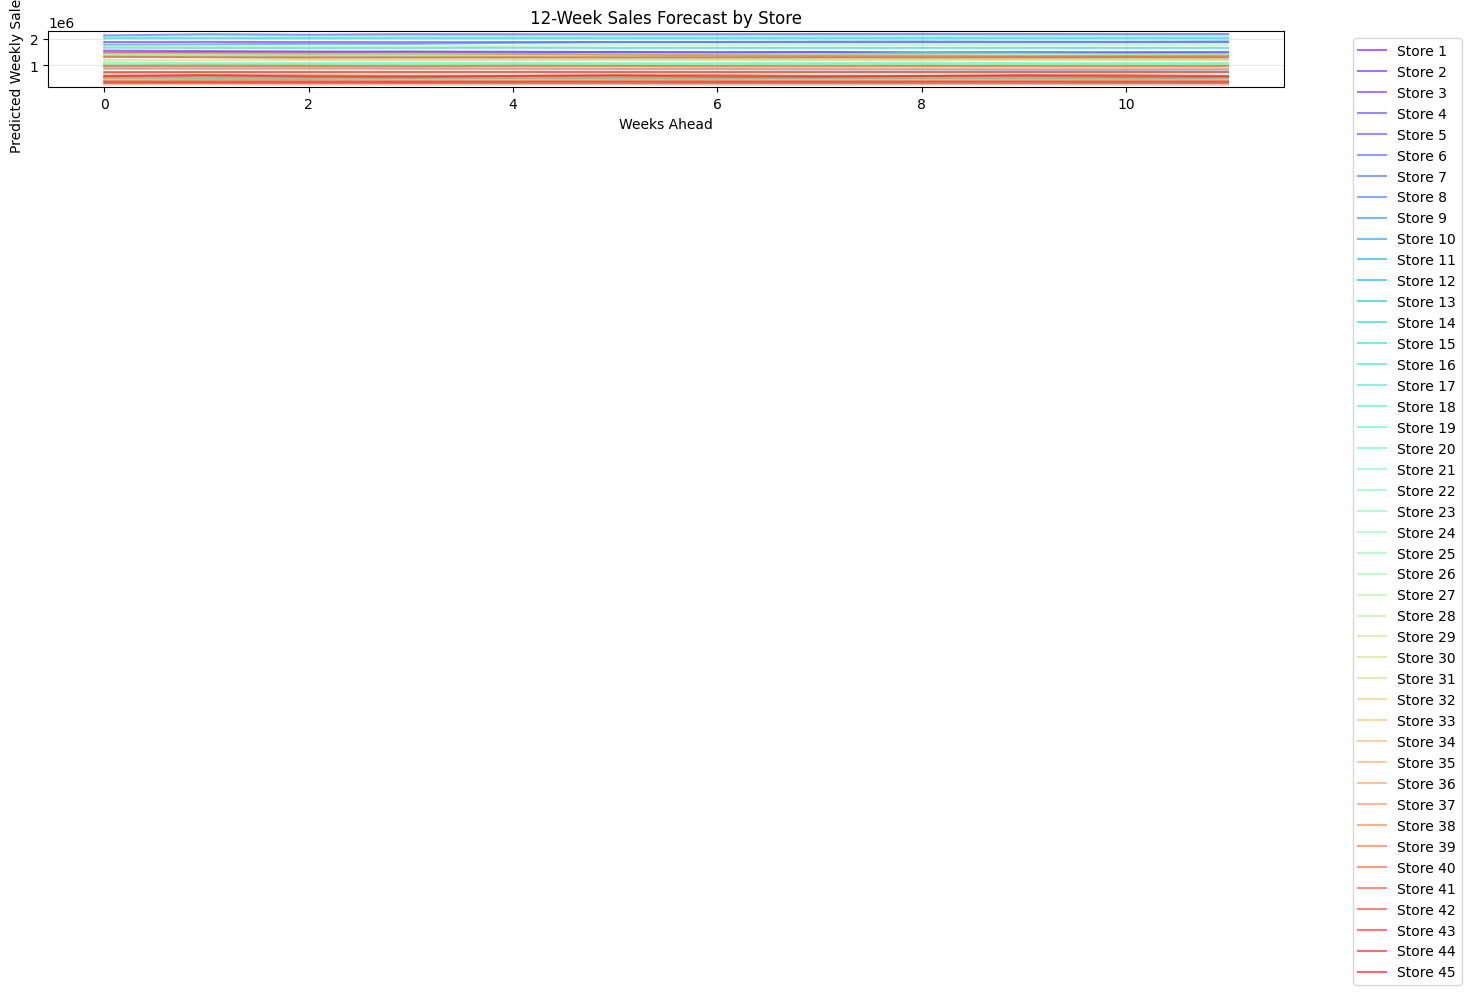


Predicted Weekly Sales for Next 12 Weeks (in dollars):

Store 1:
Week 1: $1,556,183.26
Week 2: $1,536,361.37
Week 3: $1,522,265.96
Week 4: $1,517,187.22
Week 5: $1,514,127.76
Week 6: $1,498,798.52
Week 7: $1,490,555.64
Week 8: $1,494,665.70
Week 9: $1,475,455.08
Week 10: $1,473,076.11
Week 11: $1,483,758.40
Week 12: $1,484,053.88

Store 2:
Week 1: $1,879,739.61
Week 2: $1,886,252.96
Week 3: $1,876,856.07
Week 4: $1,874,449.89
Week 5: $1,875,664.08
Week 6: $1,875,486.64
Week 7: $1,875,385.95
Week 8: $1,875,385.95
Week 9: $1,875,385.95
Week 10: $1,875,385.95
Week 11: $1,875,385.95
Week 12: $1,875,385.95

Store 3:
Week 1: $411,063.86
Week 2: $417,263.91
Week 3: $417,888.52
Week 4: $417,280.45
Week 5: $417,515.11
Week 6: $417,193.01
Week 7: $417,193.01
Week 8: $417,193.01
Week 9: $417,193.01
Week 10: $417,193.01
Week 11: $417,193.01
Week 12: $417,193.01

Store 4:
Week 1: $2,128,567.14
Week 2: $2,174,873.04
Week 3: $2,154,858.99
Week 4: $2,177,794.22
Week 5: $2,174,946.65
Week 6: $2,173,52

In [ ]:
# Visualize predictions
plt.figure(figsize=(15, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(all_predictions)))

for pred, color in zip(all_predictions, colors):
    plt.plot(range(12), pred['Predictions'],
            label=f"Store {pred['Store']}",
            color=color,
            alpha=0.6)

plt.title('12-Week Sales Forecast by Store')
plt.xlabel('Weeks Ahead')
plt.ylabel('Predicted Weekly Sales ($)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print predictions
print("\nPredicted Weekly Sales for Next 12 Weeks (in dollars):")
for pred in all_predictions:
    print(f"\nStore {pred['Store']}:")
    for week, sales in enumerate(pred['Predictions'], 1):
        print(f"Week {week}: ${sales:,.2f}")

/var/folders/9f/nm6pdjxn1mngg6_w0jx3hmlm0000gn/T/ipykernel_14541/204767502.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


NameError: name 'all_predictions' is not defined

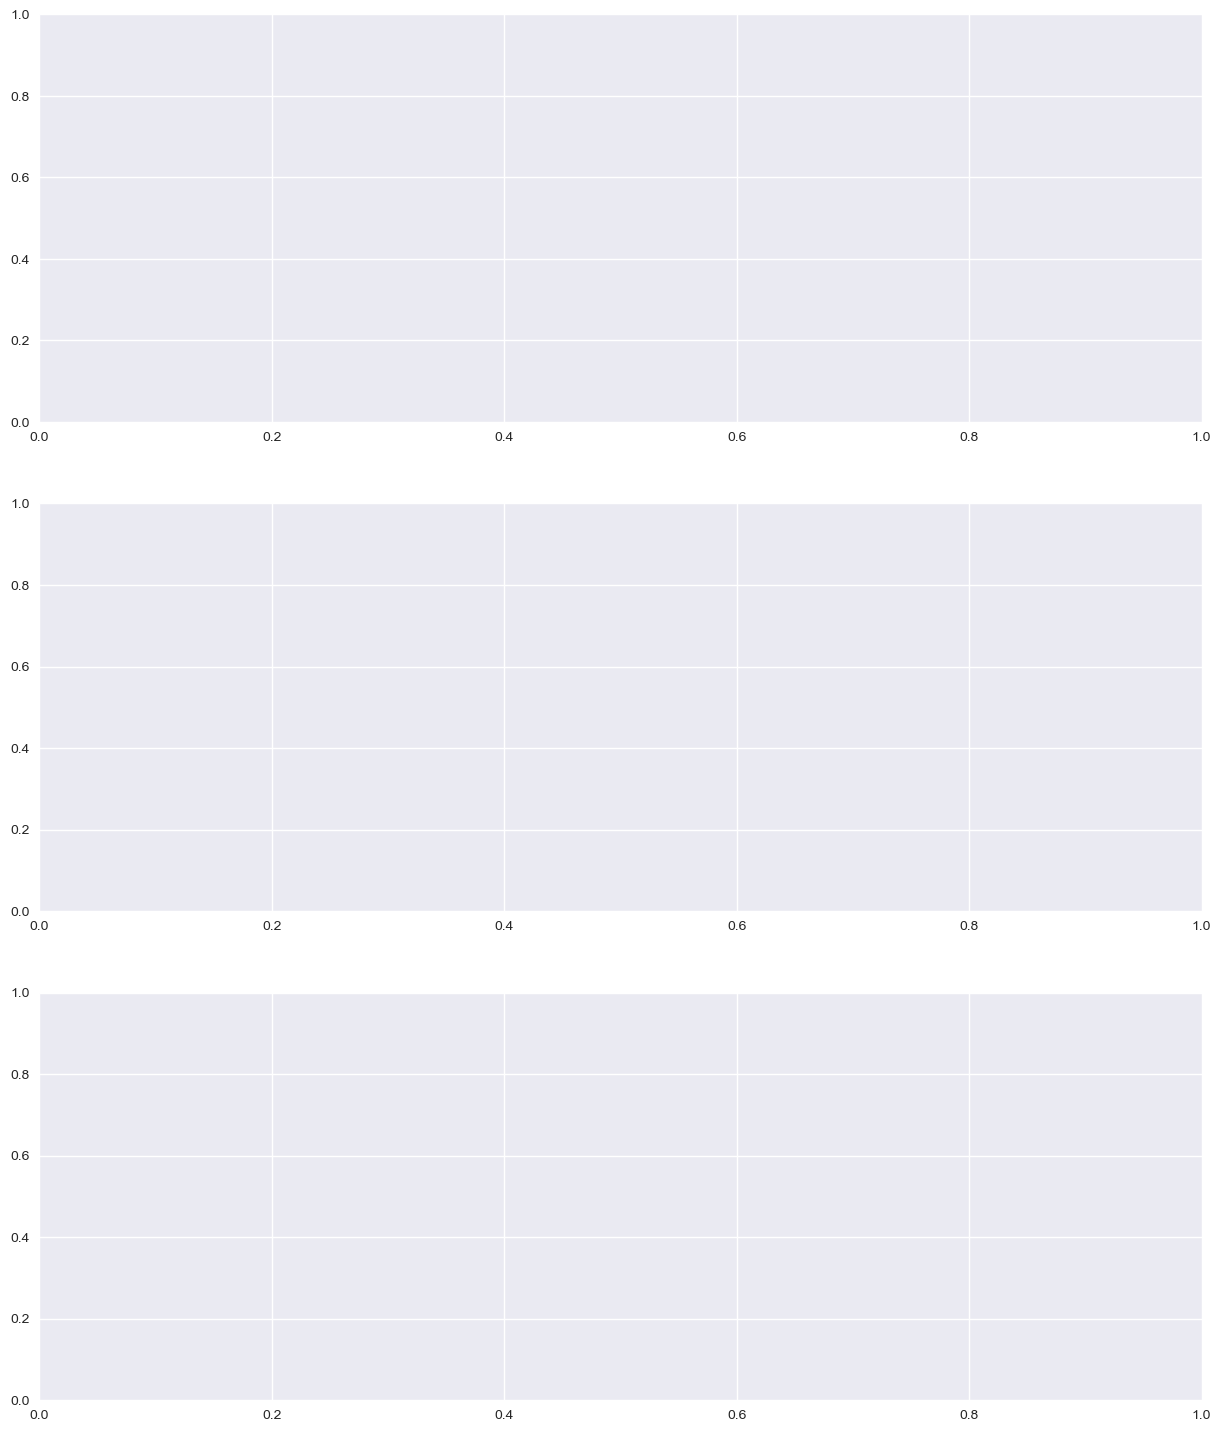

In [6]:
import seaborn as sns
# Create multiple subplots for groups of stores
plt.style.use('seaborn')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

# Group stores based on their average predicted sales
store_avgs = {pred['Store']: np.mean(pred['Predictions']) for pred in all_predictions}
sorted_stores = sorted(store_avgs.items(), key=lambda x: x[1], reverse=True)

# Top 15 stores
for pred in all_predictions:
    if pred['Store'] in [store[0] for store in sorted_stores[:15]]:
        ax1.plot(range(1, 13), pred['Predictions'],
                marker='o', linewidth=2,
                label=f'Store {pred["Store"]}')

ax1.set_title('Sales Forecast - Top 15 Stores', fontsize=12, pad=10)
ax1.set_ylabel('Predicted Weekly Sales ($)')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.ticklabel_format(style='plain', axis='y')

# Middle 15 stores
for pred in all_predictions:
    if pred['Store'] in [store[0] for store in sorted_stores[15:30]]:
        ax2.plot(range(1, 13), pred['Predictions'],
                marker='o', linewidth=2,
                label=f'Store {pred["Store"]}')

ax2.set_title('Sales Forecast - Middle 15 Stores', fontsize=12, pad=10)
ax2.set_ylabel('Predicted Weekly Sales ($)')
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.ticklabel_format(style='plain', axis='y')

# Bottom 15 stores
for pred in all_predictions:
    if pred['Store'] in [store[0] for store in sorted_stores[30:]]:
        ax3.plot(range(1, 13), pred['Predictions'],
                marker='o', linewidth=2,
                label=f'Store {pred["Store"]}')

ax3.set_title('Sales Forecast - Bottom 15 Stores', fontsize=12, pad=10)
ax3.set_xlabel('Weeks Ahead')
ax3.set_ylabel('Predicted Weekly Sales ($)')
ax3.grid(True, alpha=0.3)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.ticklabel_format(style='plain', axis='y')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of Predictions:")
for group, stores in [("Top Stores", sorted_stores[:15]),
                     ("Middle Stores", sorted_stores[15:30]),
                     ("Bottom Stores", sorted_stores[30:])]:
    avg_sales = np.mean([store[1] for store in stores])
    print(f"\n{group}:")
    print(f"Average Weekly Sales: ${avg_sales:,.2f}")
    print("Stores:", [store[0] for store in stores])